<center><h1><font color='green'>Prueba - Análisis estadístico con Python</color></h3></center>
<font color='yellow'><hr></color>
<center><h2><font color='purple'>Rodrigo Arriaza Rojas</color></h2></center>


# 📊 Examen Final - Python para Análisis Estadístico

Este notebook corresponde al examen final del módulo de Análisis Estadístico con Python, como parte del curso de Analista de Datos en Desafío Latam.

Se realiza un análisis exploratorio utilizando estadísticas descriptivas y visualizaciones, con herramientas como Pandas, Matplotlib y Seaborn.


#

In [3]:
#importando librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
#Cargando archivos
df = pd.read_csv('cardio.csv', delimiter=',')
df.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,M,39,4.0,No,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,F,46,2.0,No,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,M,48,1.0,Yes,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,F,61,3.0,Yes,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,F,46,3.0,Yes,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
#Explorando datos
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 529.9+ KB


,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4133.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,49.584946,1.978950,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,8.572160,1.019791,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
#Viendo si hay datos NaN
df.isna().sum()

sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
#Eliminando datos NaN
df.dropna(inplace=True)

In [8]:
#Revisando si hay datos duplicados
duplicados = df.duplicated().sum()
print(duplicados)

0


Una vez eliminado los valores NaN, vamos a graficar para ver posibles correlaciones y si hay outliers en los datos

In [9]:
columnas = df.columns
print(columnas)

Index(['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


2. Escoge tres variables cuantitativas y realiza un análisis descriptivo de ellas,
utilizando indicadores y gráficos. ¿Cuaĺ presenta mayor dispersión?

In [10]:
#Crear variable ccon la columnas de interes
variables = ['age', 'totChol', 'sysBP']

#Analisis descriptivo
desc_stats = df[variables].describe()
#impresion
print(desc_stats)

               age      totChol        sysBP
count  3656.000000  3656.000000  3656.000000
mean     49.557440   236.873085   132.368025
std       8.561133    44.096223    22.092444
min      32.000000   113.000000    83.500000
25%      42.000000   206.000000   117.000000
50%      49.000000   234.000000   128.000000
75%      56.000000   263.250000   144.000000
max      70.000000   600.000000   295.000000


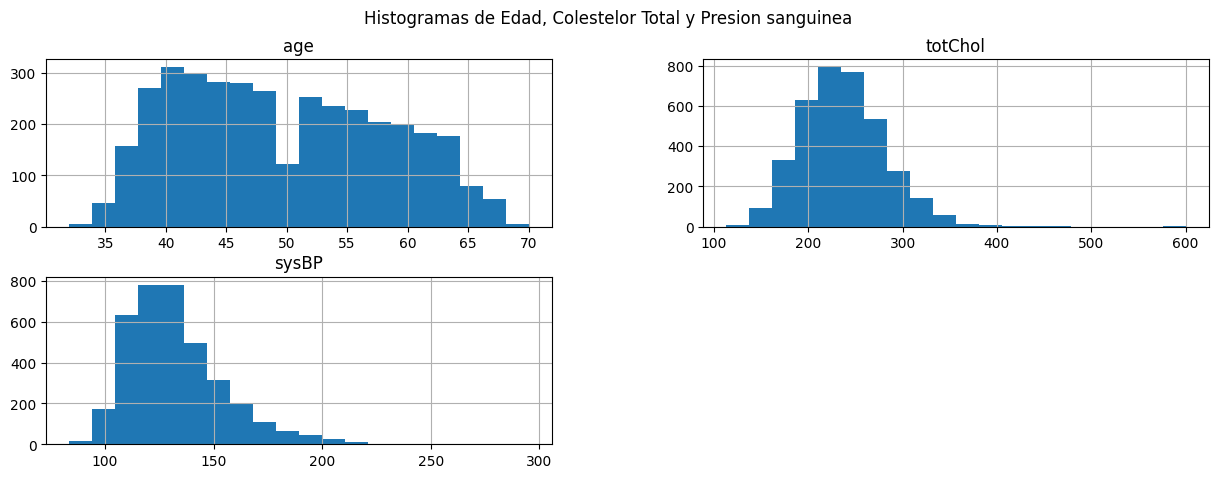

In [11]:
# Histogramas para ver distribucion de cada variable

df[variables].hist(bins=20, figsize=(15,5))
plt.suptitle('Histogramas de Edad, Colestelor Total y Presion sanguinea')
plt.show()

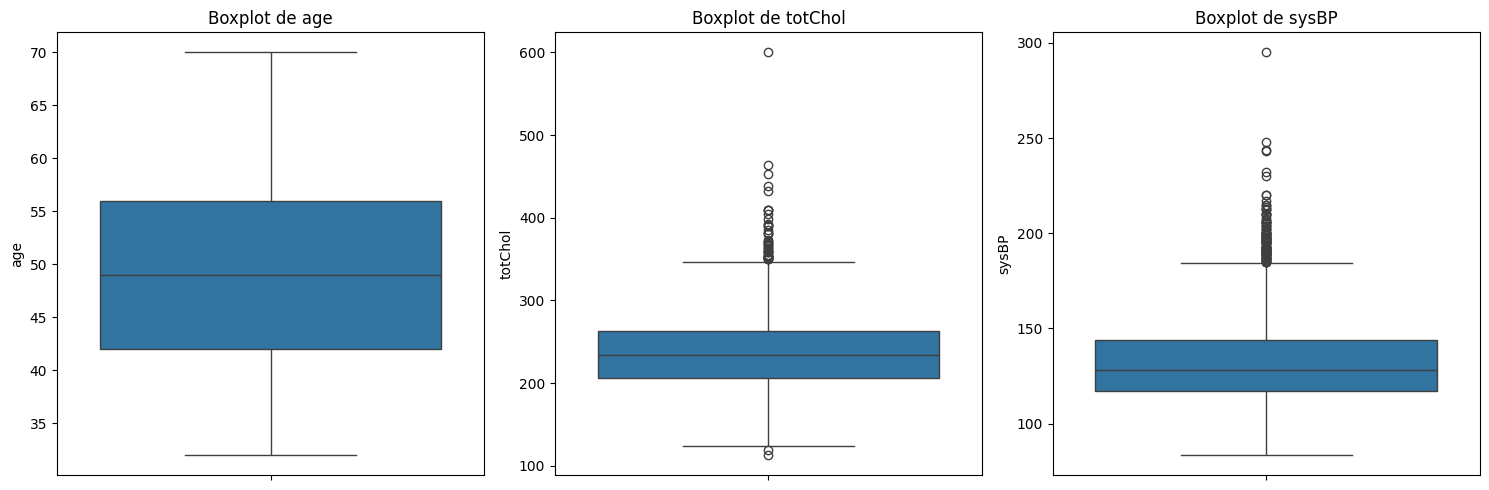

In [12]:
# Crear boxplots para ver dispersion y outliers
plt.figure(figsize=(15, 5))
for i, var in enumerate(variables):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[var])
    plt.title(f'Boxplot de {var}')
plt.tight_layout()
plt.show()

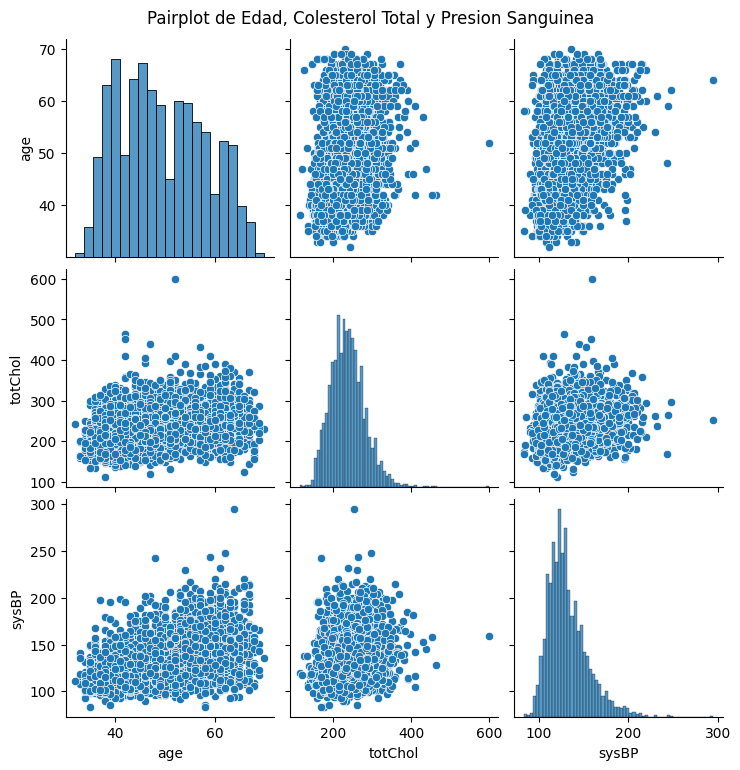

In [13]:
#Pairplot de las columnas
sns.pairplot(df[variables])
plt.suptitle('Pairplot de Edad, Colesterol Total y Presion Sanguinea', y=1.02)
plt.show()

De las variables seleccionadas, topChol tiene una dispersión considerable (con outliers incluidos), pero Presión Sanguinea(sysBP) es la que presenta mayor dispersión del las tres variables.

3. Elimina los datos atípicos del dataset. Para las siguientes preguntas, considera el
dataset "limpio"

In [14]:
print(columnas)

Index(['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


In [15]:
#Usaremos el método IQR para eliminar los outliers de las columnas numéricas

#Columnas binarias
binary_colums = ['BPMeds', 'prevalentStroke', 'diabetes', 'prevalentStroke', 'prevalentHyp', 'TenYearCHD']
# Identificar columnas numéricas
numeric_columns = ['age', 'education', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
#Definir funcion para aplicar el IQR a las columnas
def remove_outliers_iqr(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

#Aplicando la función al DF
df_limpio = remove_outliers_iqr(df, numeric_columns)
print(df_limpio.describe())

               age    education   cigsPerDay       BPMeds  prevalentStroke  \
count  3194.000000  3194.000000  3194.000000  3194.000000      3194.000000   
mean     49.060739     2.013463     9.078898     0.020977         0.005009   
std       8.464591     1.027407    11.710119     0.143329         0.070611   
min      32.000000     1.000000     0.000000     0.000000         0.000000   
25%      42.000000     1.000000     0.000000     0.000000         0.000000   
50%      48.000000     2.000000     0.000000     0.000000         0.000000   
75%      56.000000     3.000000    20.000000     0.000000         0.000000   
max      70.000000     4.000000    50.000000     1.000000         1.000000   

       prevalentHyp     diabetes      totChol        sysBP        diaBP  \
count   3194.000000  3194.000000  3194.000000  3194.000000  3194.000000   
mean       0.266437     0.006888   234.355980   129.098622    81.553068   
std        0.442165     0.082720    40.422224    18.013287    10.428470 

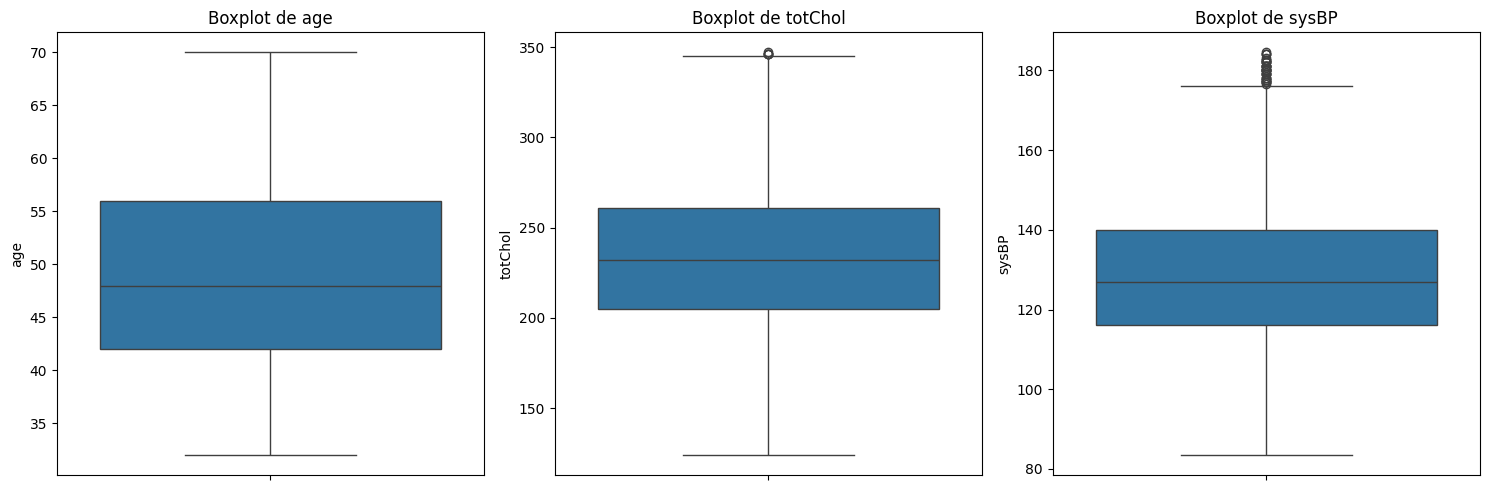

In [16]:
#Revisión si se aplico el IQR de forma adecuada

# Crear boxplots para ver dispersion y outliers
plt.figure(figsize=(15, 5))
for i, var in enumerate(variables):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df_limpio[var])
    plt.title(f'Boxplot de {var}')
plt.tight_layout()
plt.show()

4. ¿Qué variables cuantitativas presentan mayor correlación? Explica.

In [17]:
# Aplicar get_dummies a las columnas 'sex' y 'currentSmoker'
df_dummies = pd.get_dummies(df_limpio, columns=['sex', 'currentSmoker'], drop_first=False)

In [18]:
#libreria
from scipy.stats import pearsonr

#Cálculo
r, p_value = pearsonr(df_limpio['age'], df_limpio['prevalentHyp'])
print(f'Coeficiente de correlación de Pearson (age vs prevalentHyp): {r}')
print(f'Valor p (age vs prevalentHyp): {p_value}')


alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("La correlación entre age y prevalentHyp es estadísticamente significativa.")
else:
    print("La correlación entre age y prevalentHyp no es estadísticamente significativa.")
print('---')
# Segundo cálculo
r, p_value = pearsonr(df_limpio['cigsPerDay'], df_limpio['totChol'])
print(f'Coeficiente de correlación de Pearson (CigsPerDay y TotChol): {r}')
print(f'Valor p (cigsPerDay vs totChol): {p_value}')

# Evaluar significancia
if p_value < alpha:
    print("La correlación entre cigsPerDay y totChol es estadísticamente significativa.")
else:
    print("La correlación entre cigsPerDay y totChol no es estadísticamente significativa.")
print('---')
# Tercer calculo
r, p_value = pearsonr(df_limpio['BPMeds'], df_limpio['prevalentHyp'])
print(f'Coeficiente de correlación de Pearson BPMeds y prevalentHyp): {r}')
print(f'Valor p (BPMeds y prevalentHyp): {p_value}')

if p_value < alpha:
    print("La correlación entre BPmeds y  prevalentHyp es estadísticamente significativa.")
else:
    print("La correlación entre BPMeds y PrevalentHyp no es estadísticamente significativa.")
print('---')

#Cuarto cálculo
r, p_value = pearsonr(df_limpio['BMI'], df_limpio['diaBP'])
print(f'Coeficiente de correlación de Pearson BMI y diaBP): {r}')
print(f'Valor p (BMI y diaBP): {p_value}')

if p_value < alpha:
    print("La correlación entre BMI y diaBP es estadísticamente significativa.")
else:
    print("La correlación entre BMI y diaBP no es estadísticamente significativa.")
print('---')

#Quinto cálculo
r, p_value = pearsonr(df_limpio['BMI'], df_limpio['totChol'])
print(f'Coeficiente de correlación de Pearson BMI y totChol): {r}')
print(f'Valor p (BMI y totChol): {p_value}')

if p_value < alpha:
    print("La correlación entre BMI y totChol es estadísticamente significativa.")
else:
    print("La correlación entre BMI y totChol no es estadísticamente significativa.")
print('---')



Coeficiente de correlación de Pearson (age vs prevalentHyp): 0.2804308922434382
Valor p (age vs prevalentHyp): 8.484013730744273e-59
La correlación entre age y prevalentHyp es estadísticamente significativa.
---
Coeficiente de correlación de Pearson (CigsPerDay y TotChol): -0.02948829168577696
Valor p (cigsPerDay vs totChol): 0.09566261786887244
La correlación entre cigsPerDay y totChol no es estadísticamente significativa.
---
Coeficiente de correlación de Pearson BPMeds y prevalentHyp): 0.24288171733978708
Valor p (BPMeds y prevalentHyp): 4.1458745054094496e-44
La correlación entre BPmeds y  prevalentHyp es estadísticamente significativa.
---
Coeficiente de correlación de Pearson BMI y diaBP): 0.33814245299091494
Valor p (BMI y diaBP): 2.868531286414968e-86
La correlación entre BMI y diaBP es estadísticamente significativa.
---
Coeficiente de correlación de Pearson BMI y totChol): 0.15576142013215744
Valor p (BMI y totChol): 8.476093227434645e-19
La correlación entre BMI y totChol es

5. Si de este dataset se escoge un paciente al azar, ¿cuál es la probabilidad de que sea
hombre, si se sabe que pertenece al mayor cuartil de la variable correspondiente al
índice de masa corporal?

In [19]:
import pandas as pd

#get_dummies a sex para poder utilizar sus datos
df_dummies = pd.get_dummies(df, columns=['sex'], drop_first=False)

# Revisión de la columna
print(df_dummies.head())

# Calcular el tercer cuartil (Q3) del BMI
q3 = df_dummies['BMI'].quantile(0.75)

# Filtrar los datos para incluir solo aquellos en el mayor cuartil de BMI
df_mayor_cuartil = df_dummies[df_dummies['BMI'] > q3]

# Verificar el DF
print(f"Número de pacientes en el mayor cuartil de BMI: {len(df_mayor_cuartil)}")
print('\n')
# Conteo numero de hombres
num_hombres = df_mayor_cuartil['sex_M'].sum()
total_pacientes_mayor_cuartil = len(df_mayor_cuartil)

# Calculo de probabilidad
prob_hombre = num_hombres / total_pacientes_mayor_cuartil

# Imprimir el resultado
print(f'La probabilidad de que un paciente sea hombre, dado que está en el mayor cuartil de BMI, es: {prob_hombre:.4f}')


   age  education currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0   39        4.0            No         0.0     0.0                0   
1   46        2.0            No         0.0     0.0                0   
2   48        1.0           Yes        20.0     0.0                0   
3   61        3.0           Yes        30.0     0.0                0   
4   46        3.0           Yes        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  sex_F  sex_M  
0           0  False   True  
1           0   True  False  
2 

6. ¿Es razonable afirmar que, para una persona cualquiera (no necesariamente dentro
del dataset), su ritmo cardiaco promedio es 75? Explica y justifica.

In [20]:
#Vamos a realizar el testt para realizar la prueba de hipótesis

#realizamos estadísticas descriptivas para la columa heartRate
mean = df_limpio['heartRate'].mean()
std_dev = df_limpio['heartRate'].std()
n = len(df_limpio)

print(mean)
print(std_dev)
print(n)

74.574827802129
10.668342638647653
3194


In [21]:
#test de hipótesis

presion_referencia = 75

#Prueba de la muestra
t_stat, p_value = stats.ttest_1samp(df_limpio['heartRate'], presion_referencia)
print(f'Valor t: {t_stat}')
print(f'Valor p: {p_value}')

alpha = 0.05

if p_value < alpha:
    print('Se rechaza la hipótesis nula. El ritmo cardíaco promedio es significativamente diferente de 75')
else:
    print(f'No se puede rechazar la hipótesis nula, no hay suficiente evidencia para decir que el ritmo cardíaco es diferente de 75')

Valor t: -2.252347306102251
Valor p: 0.02436798674614562
Se rechaza la hipótesis nula. El ritmo cardíaco promedio es significativamente diferente de 75


7. Ser hombre, ¿influye en el promedio de cigarrillos consumidos por día, dentro de los
pacientes fumadores? Explica.

In [22]:
#Ver prueba de hipótesis

#calcular n hombres
hombres = df_limpio[df_limpio['sex'] == 'M']['cigsPerDay']
#calcular n mujeres
mujeres = df_limpio[df_limpio['sex'] == 'F']['cigsPerDay']

#promedios hombres y mujeres
promedio_hombres = hombres.mean()
promedio_mujeres = mujeres.mean()

print(f'Promedio hombres: {promedio_hombres}')
print(f'Promedio mujeres: {promedio_mujeres}')

Promedio hombres: 13.262612301313062
Promedio mujeres: 5.613623354321694


In [23]:
#Prueba de hipótesis para saber si influye el sexo en la cantidad de cigarros de fumados por día

t_stat, p_value = stats.ttest_ind(hombres, mujeres, equal_var=False)

print(f'Valor t: {t_stat}')
print(f'Valor p: {p_value}')

alpha = 0.05

if p_value < alpha:
    print("Rechazamos la hipótesis nula. Ser hombre influye en el promedio de cigarrillos consumidos por día")
else:
    print("No podemos rechazar la hipótesis nula. No hay evidencia suficiente para decir que ser hombre influye en el promedio de cigarrillos consumidos por día")


Valor t: 18.720688451509623
Valor p: 3.975070750597588e-73
Rechazamos la hipótesis nula. Ser hombre influye en el promedio de cigarrillos consumidos por día


8. Construye un modelo de regresión lineal que permita relacionar 6 variables del
dataset con el índice de masa corporal. (Debes incluir al menos dos variables
cualitativas). Evalúa tu modelo y explica.

In [24]:
print(columnas)
print(numeric_columns)

Index(['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')
['age', 'education', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     70.59
Date:                Wed, 30 Apr 2025   Prob (F-statistic):           3.11e-70
Time:                        01:31:47   Log-Likelihood:                -8335.6
No. Observations:                3194   AIC:                         1.668e+04
Df Residuals:                    3188   BIC:                         1.672e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           20.6404      0.606     34.084   

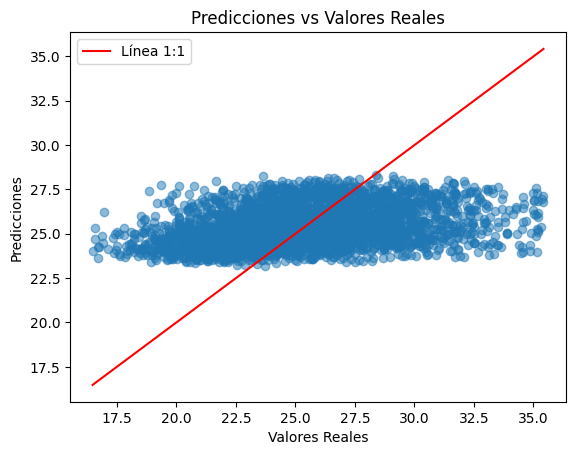

In [25]:
import statsmodels.api as sm #Importando libreria

#Regresion líneal

# Variables independientes
X = df_limpio[[ 'sex','age', 'totChol', 'prevalentHyp', 'heartRate']]
# Variable dependiente
y = df_limpio['BMI']

# Convertir variables de X en dummies (en el caso de las categóricas)
X = pd.get_dummies(X, drop_first=True)

# Asegurarse de que todas las variables sean numéricas
X = X.astype(float)
y = y.astype(float)

# Constante X
X = sm.add_constant(X)

# Ajuste del modelo
model = sm.OLS(y, X).fit()

# Impresión
print(model.summary())

# Visualización del ajuste del modelo
plt.scatter(y, model.predict(X), alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', label='Línea 1:1')
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.legend()
plt.show()


Conclusiones:

F-statistic es alto y la probabilidad asociada baja. Lo ue quiere decir que el modelo en su conjunto es significativo.
-El modelo es estadísticamente significativo en su conjunto, pero el R2 es bajo.
-LAs variables sexo(masculino), edad, colesterol e hipertensión tienen un impacto positivo en el BMI
-Hay un problema con la distribución de los residuos en el modelo, por lo cual habría que revizar el modelo.

9. Construye un modelo de regresión logística para predecir el riesgo de sufrir una
enfermedad coronaria en los próximos diez años, a partir de las variables descritas.
Verifica el balanceo de datos y evalúa tu modelo.

C:\Users\Infer\AppData\Local\Temp\ipykernel_24380\1877330596.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio.dropna(inplace=True)


Optimization terminated successfully.
         Current function value: 0.359510
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3194
Model:                          Logit   Df Residuals:                     3184
Method:                           MLE   Df Model:                            9
Date:                Wed, 30 Apr 2025   Pseudo R-squ.:                 0.08327
Time:                        01:31:48   Log-Likelihood:                -1148.3
converged:                       True   LL-Null:                       -1252.6
Covariance Type:            nonrobust   LLR p-value:                 5.178e-40
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -7.0555      0.716     -9.856      0.000      -8.459      -5.652
totChol 

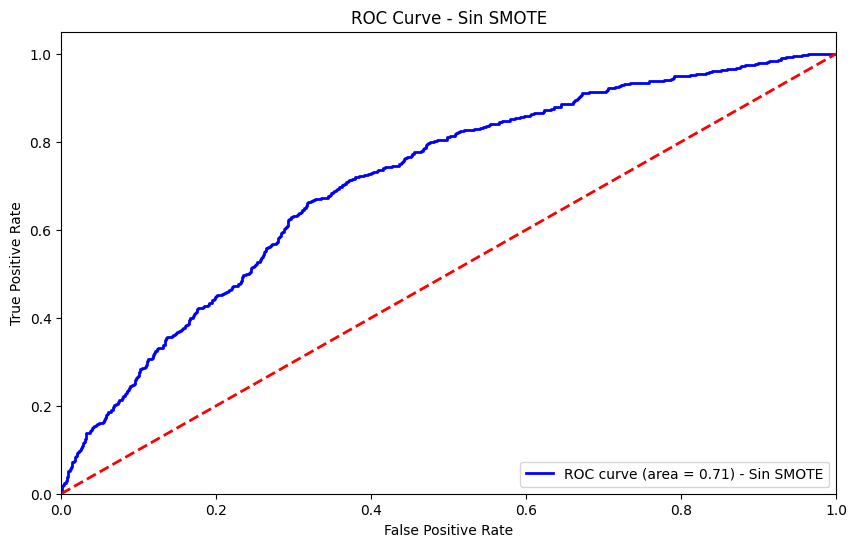

In [26]:
#Modelo prediccion logistica

import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc, roc_auc_score

#Ya eliminamos los NaN pero nos volvemos a asegurar
df_limpio.dropna(inplace=True)

#Columnas de la variable X
X = df_limpio[['totChol', 'age', 'currentSmoker', 'BPMeds', 'prevalentStroke', 
               'prevalentHyp', 'diabetes', 'BMI', 'heartRate']]
y = df_limpio['TenYearCHD'] #Variable dependiente

# convertir X a dummies 
X = pd.get_dummies(X, drop_first=True)

#Pasar las columnas a númerico
X = X.astype(float)
y = y.astype(float)

# Constante X
X = sm.add_constant(X)

# Ajuste modelo
model = sm.Logit(y, X).fit()

# Resumen del modelo
print(model.summary())

# Probabilidades
y_pred_proba = model.predict(X)

# Calcular ROC y AUC-ROC
fpr, tpr, _ = roc_curve(y, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Graficar curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f) - Sin SMOTE' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Sin SMOTE')
plt.legend(loc="lower right")
plt.show()

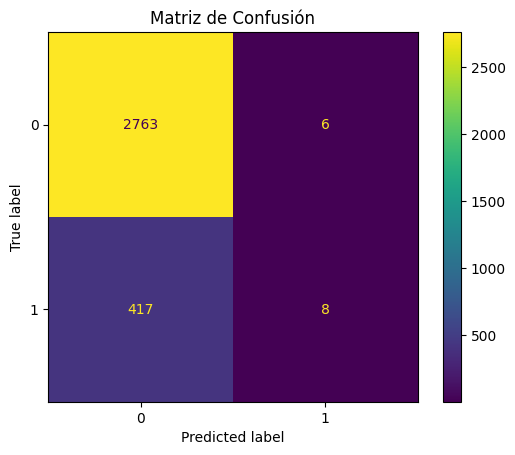

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predicciones del modelo
y_pred = model.predict(X)
y_pred_binary = [1 if i > 0.5 else 0 for i in y_pred]  # Convertir probabilidades en clases

# Matriz de confusión
cm = confusion_matrix(y, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Matriz de Confusión')
plt.show()



Optimization terminated successfully.
         Current function value: 0.619835
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 5538
Model:                          Logit   Df Residuals:                     5528
Method:                           MLE   Df Model:                            9
Date:                Wed, 30 Apr 2025   Pseudo R-squ.:                  0.1058
Time:                        01:31:51   Log-Likelihood:                -3432.6
converged:                       True   LL-Null:                       -3838.6
Covariance Type:            nonrobust   LLR p-value:                5.536e-169
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.2714      0.384    -13.724      0.000      -6.024      -4.519
totChol 

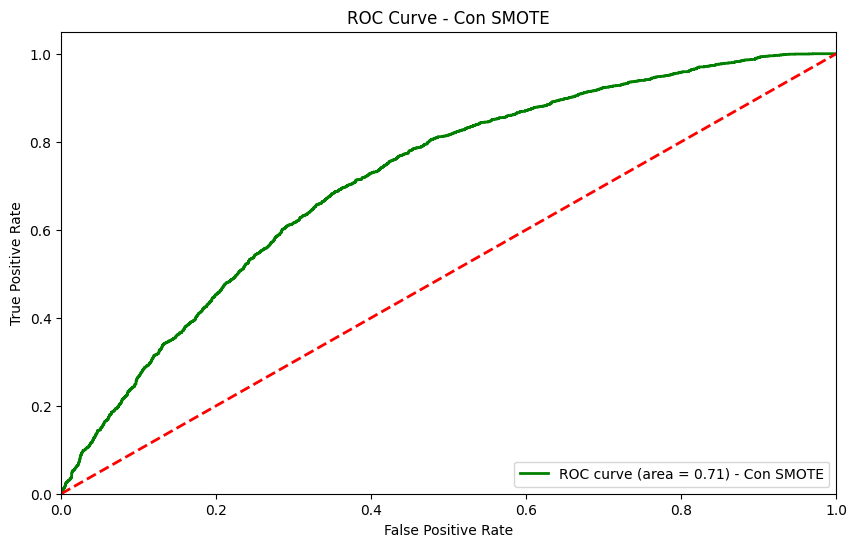

In [28]:
#Como tenemos desbalanceo de clases, usaremos SMOTE para equilibrarlas

# Modelo predicción logística con SMOTE

from imblearn.over_sampling import SMOTE

# Aplicando SMOTE para equilibrar las clases
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Ajuste
X_res = sm.add_constant(X_res)
model_smote = sm.Logit(y_res, X_res).fit()

# Resumen
print(model_smote.summary())

# Probabilidades
y_pred_proba_smote = model_smote.predict(X_res)

# Calcular ROC y AUC-ROC
fpr_smote, tpr_smote, _ = roc_curve(y_res, y_pred_proba_smote)
roc_auc_smote = auc(fpr_smote, tpr_smote)

# Graficar curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_smote, tpr_smote, color='green', lw=2, label='ROC curve (area = %0.2f) - Con SMOTE' % roc_auc_smote)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Con SMOTE')
plt.legend(loc="lower right")
plt.show()



-Se puede observar que el modelo con Smote tiene una curva más suacve, lo que indica un balanceo en las clases y una mejora en el rendimiento. Por el contrario, el modelo SIN SMOTE presenta una curva con picos lo que podría explicarse por el desbalanceo de clases.

-El modelo tiene un pesudo R-squared de 10.58% lo que explica la variabilidad en enfermedad coronaria a 10 años.
-El modelo en su conjunto tiene un LLR p-value bajo, lo que indica que es un modelo significativo.

PrevalentStroke, prevalentHyp, Currentsmoker(yes) y BMI muestran que al aumentar su probabilidad, también aumenta la probabilidad de sufrir un accidente cardíaco en un plazo de 10 años. 



10. Separa los modelos de regresión anteriores en dos distintos, respectivamente,
considerando alguna variable categórica. Compara y concluye.

In [29]:
# Verificar valores únicos en la columna 'sex'
#df_limpio

In [30]:
#Librerias
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Ver valores columna sex
print(df_limpio['sex'].unique())

#Doble revisión de no tener NAN en el DF
df_limpio.dropna(inplace=True)

# Subdividir el DF en sexo
df_male = df_limpio[df_limpio['sex'] == 'M']
df_female = df_limpio[df_limpio['sex'] == 'F']

# Revisión de n de 
print(f"Numero de registros para hombres: {df_male.shape[0]}")
print(f"Numero de registros para mujeres: {df_female.shape[0]}")

['M' 'F']
Numero de registros para hombres: 1447
Numero de registros para mujeres: 1747


C:\Users\Infer\AppData\Local\Temp\ipykernel_24380\1888215692.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio.dropna(inplace=True)


Optimization terminated successfully.
         Current function value: 0.428709
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 1447
Model:                          Logit   Df Residuals:                     1437
Method:                           MLE   Df Model:                            9
Date:                Wed, 30 Apr 2025   Pseudo R-squ.:                 0.07716
Time:                        01:31:51   Log-Likelihood:                -620.34
converged:                       True   LL-Null:                       -672.21
Covariance Type:            nonrobust   LLR p-value:                 2.750e-18
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -7.7742      1.038     -7.492      0.000      -9.808      -5.740
totChol 

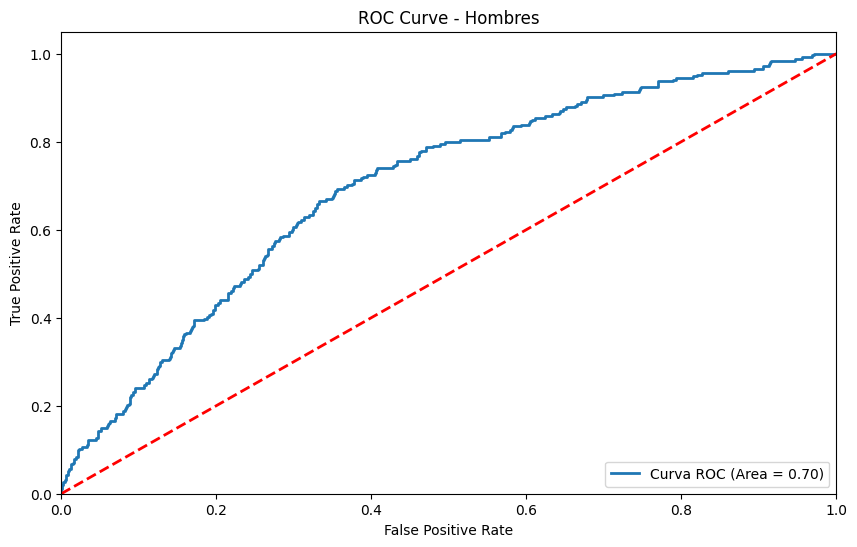

AUC-PR: 0.3230954936708728


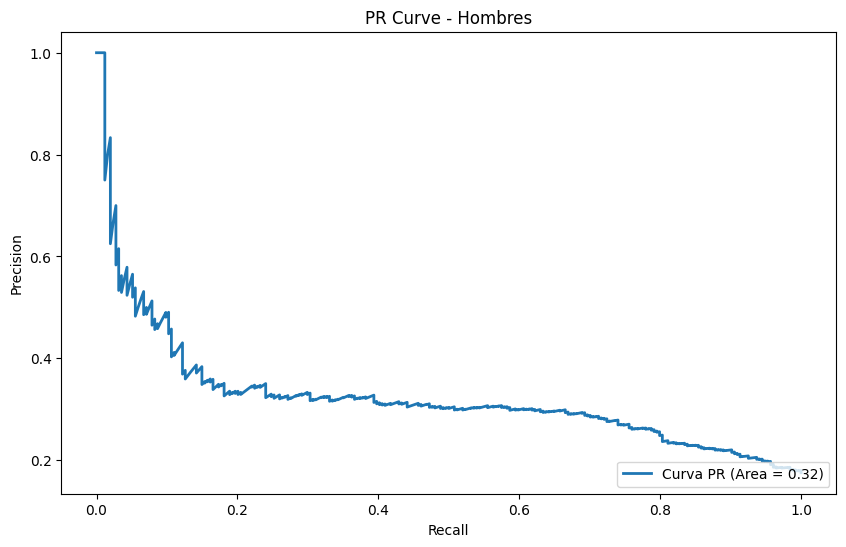

Optimization terminated successfully.
         Current function value: 0.290690
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 1747
Model:                          Logit   Df Residuals:                     1737
Method:                           MLE   Df Model:                            9
Date:                Wed, 30 Apr 2025   Pseudo R-squ.:                 0.09274
Time:                        01:31:51   Log-Likelihood:                -507.84
converged:                       True   LL-Null:                       -559.75
Covariance Type:            nonrobust   LLR p-value:                 2.646e-18
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -6.5611      1.053     -6.230      0.000      -8.625      -4.497
totChol 

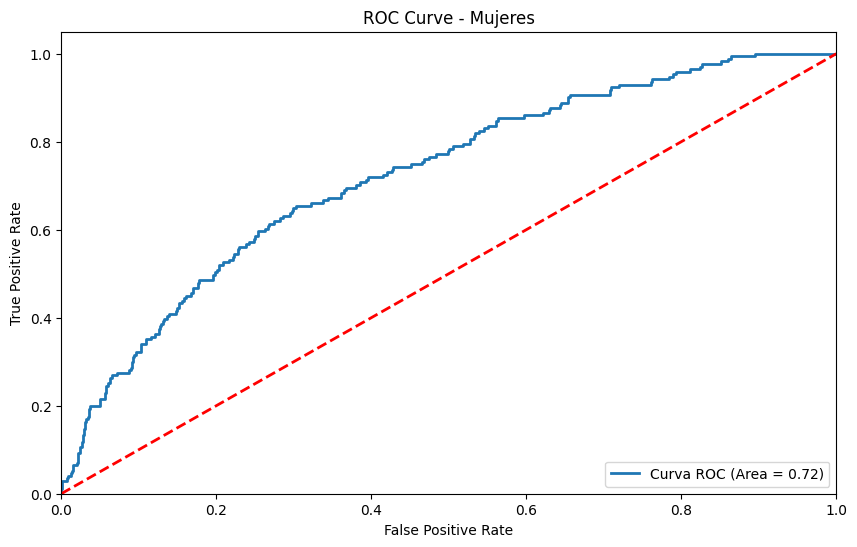

AUC-PR: 0.23623987772704158


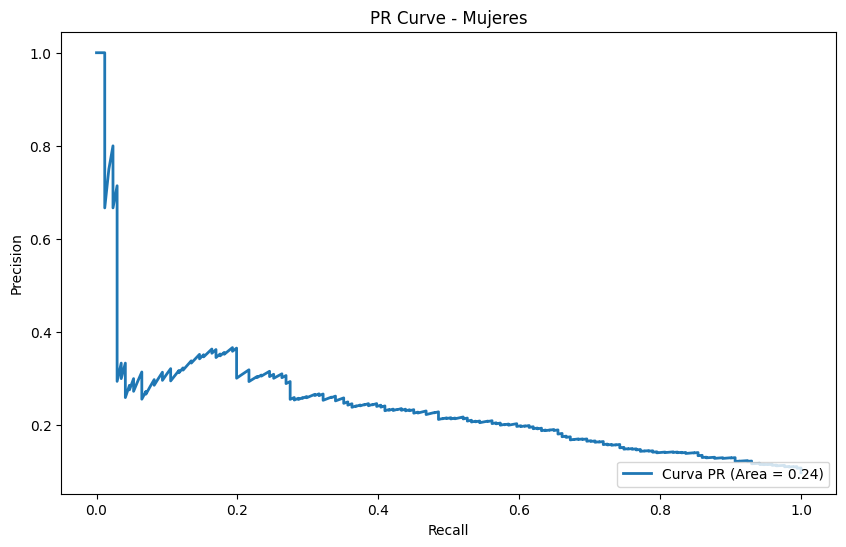

In [31]:
# Función para ajustar el modelo de regresión logística y graficar la curva ROC y AUC-PR
def ajustar_y_graficar_logistica(df, titulo):
    X = df[['totChol', 'age', 'currentSmoker', 'BPMeds', 'prevalentStroke', 
            'prevalentHyp', 'diabetes', 'BMI', 'heartRate']]
    y = df['TenYearCHD']
    
    # Convertir a dummies en caso de contener alguna columna categórica no numérica
    X = pd.get_dummies(X, drop_first=True)
    
    # Asegurarse de que todas las variables sean numéricas
    X = X.astype(float)
    y = y.astype(float)
    
    # Constante X
    X = sm.add_constant(X)
    
    # Ajustar modelo
    model = sm.Logit(y, X).fit()
    
    # Imprimir resumen del modelo
    print(model.summary())
    
    # Almacenar probabilidades predichas
    y_pred_prob = model.predict(X)
    
    # Curva ROC y AUC-ROC
    fpr, tpr, _ = roc_curve(y, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    print(f'AUC-ROC: {roc_auc}')
    
    # Graficar ROC
    plt.figure(figsize=(10,6))
    plt.plot(fpr, tpr, lw=2, label='Curva ROC (Area = %0.2f)' % roc_auc)
    plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - ' + titulo)
    plt.legend(loc="lower right")
    plt.show()
    
    # Curva AUC-PR
    precision, recall, _ = precision_recall_curve(y, y_pred_prob)
    pr_auc = auc(recall, precision)
    print(f'AUC-PR: {pr_auc}')
    
    # Graficar AUC-PR
    plt.figure(figsize=(10,6))
    plt.plot(recall, precision, lw=2, label='Curva PR (Area = %0.2f)' % pr_auc)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('PR Curve - ' + titulo)
    plt.legend(loc="lower right")
    plt.show()

# Ajuste y gráfico
ajustar_y_graficar_logistica(df_male, 'Hombres')

#Ajuste y gráfico
ajustar_y_graficar_logistica(df_female, 'Mujeres')


Ambos modelos de regresión logística muestran que la edad, hipertensión y ser fumador son factores significativos que aumentan la probabilidad de enfermedad cardiaca dentro de 10 años. El segundo modelo muestra un mejor Log-likelihood, lo que quiere decir un mejor ajuste. 

El colesterol total es significativo en el primer modelo, no así en el segundo. Esto puede sugerir que no hay una relación consistente entre totalChol y la proobabilidad de TenYearCHD.

Diferencias entre las subdivisiones

1- Edad: H 0.0900 vs Mujeres 0.0800 La edad es un factor de riesgo para ambos sexos, pero el impacto es ligeramente mayor para los hombres 
2- Fumador: H 0.4888 vs Mujeres 0.3888. Ser fumador aumenta las probabilidades de enfermedad cardiaca, pero el impacto es mayor en hombres
3- Hipertención: H 0.4362 vs Mujeres 0.5362. El riesgo de hipertensión aumenta la enfermedades cardiacas, pero el impacto es mayor en las mujeres.